In [2]:
import sys, os
sys.path.append(os.path.abspath("src"))  # src is next to the notebook

from gdp_utils import ISO3, fetch_worldbank_gdp, clean_gdp, to_wide, plot_gdp
import matplotlib.pyplot as plt

print("Imports OK ✅")


Matplotlib is building the font cache; this may take a moment.


Imports OK ✅


In [3]:
countries = [ISO3[c] for c in [
    "United Kingdom","United States","Brazil","Japan","China","Germany","Switzerland"
]]
raw = fetch_worldbank_gdp(countries, 2000, 2022)
tidy = clean_gdp(raw)
wide = to_wide(tidy)

# quick checks
assert set(tidy.columns) == {"country","iso3","year","value"}
assert tidy["year"].between(2000, 2022).all()
print("Tidy OK ✅", len(tidy), "rows")
tidy.head(), wide.head()

Tidy OK ✅ 161 rows


(  country iso3  year         value
 0  Brazil   BR  2000  6.554482e+11
 1  Brazil   BR  2001  5.599836e+11
 2  Brazil   BR  2002  5.097953e+11
 3  Brazil   BR  2003  5.582337e+11
 4  Brazil   BR  2004  6.692894e+11,
 country        Brazil         China       Germany         Japan   Switzerland  \
 year                                                                            
 2000     6.554482e+11  1.223755e+12  1.966981e+12  4.968359e+12  2.792160e+11   
 2001     5.599836e+11  1.355037e+12  1.966381e+12  4.374712e+12  2.865827e+11   
 2002     5.097953e+11  1.489822e+12  2.102351e+12  4.182846e+12  3.093014e+11   
 2003     5.582337e+11  1.683903e+12  2.534716e+12  4.519562e+12  3.620751e+11   
 2004     6.692894e+11  1.984197e+12  2.852318e+12  4.893116e+12  4.039129e+11   
 
 country  United Kingdom  United States  
 year                                    
 2000       1.665535e+12   1.025095e+13  
 2001       1.649827e+12   1.058193e+13  
 2002       1.785730e+12   1.092911e+13

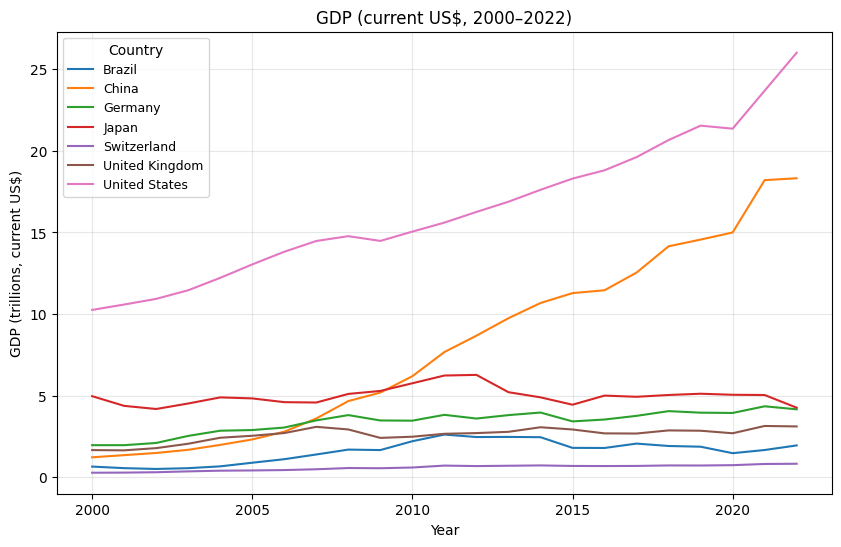

In [4]:
ax = plot_gdp(wide, title="GDP (current US$, 2000–2022)")
plt.show()

In [5]:
os.makedirs("data", exist_ok=True)
tidy.to_csv("data/gdp_tidy_2000_2022.csv", index=False)
wide.to_csv("data/gdp_wide_2000_2022.csv")
print("Saved CSVs → data/ ✅")

Saved CSVs → data/ ✅


GDP overview (2000–2022)
• US & China: highest levels; China rises fastest.
• Japan & Germany: high but flatter growth in the 2010s.
• UK & Switzerland: steady growth; Switzerland smaller but stable.
• Brazil: strong 2000s growth with mid-2010s volatility and 2020 dip.
Note: Current US$ values reflect price and FX changes.